# **Rodrigo_Mesquita_DR2_TP1**
## **Dados para Machine Learning: Feature Engineering [24E1_2]**

# Exercício 1: Compreensão de Features no Dataset Palmer Penguins

Examine o dataset Palmer Penguins e explique o que são 'features' no contexto deste dataset específico. Discuta como as features influenciam o desempenho de um modelo de Machine Learning.

> Features são variáveis inputadas no modelo para que consiga classificar realizar a predição de uma variável alvo. Neste dataset, para se prever a espécie do penguin, podem ser utilizadas as variáveis indepentendes: Altura e comprimento do bico, comprimento da nadadeira, peso, sexo ou ilha.
A utilização de features inadequadas, irrelevantes ou em excesso, prejudicará o desempenho do modelo ou levará a predições incorretas.

In [ ]:
!pip install palmerpenguins

import pandas as pd
import seaborn as sns
import sklearn as sk
import numpy as np
from palmerpenguins import load_penguins
import matplotlib.pyplot as plt


# Exercício 2: Escalares, Vetores e Espaços em Machine Learning

Com base nos dados do dataset Palmer Penguins, identifique exemplos de escalares, vetores e explique o conceito de espaços em Machine Learning.



> Valores escalares: peso e ano \
> Vetores: medidas referentes ao tamanho do bico e da nadadeira.\
> O conceito de espaços se refere a uma área multidimensional onde cada dimensão corresponde a uma features, e onde são plotadas todas as observações, de modo que um modelo possa encontrar padrões ou relações para serem utilizadas em predições ou classificações.


In [ ]:
df = load_penguins()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


# Exercício 3: Discretização com Bins Fixos no Dataset Palmer Penguins

Utilize a técnica de quantização com bins fixos para discretizar uma variável contínua do dataset Palmer Penguins. Explique a razão pela qual você escolheu essa variável e como a discretização pode afetar a análise.



> Selecionei a variável bill_length_mm, pois é uma feature de números decimais,  que consequentemente apresenta poucas repetições, sendo 164 valores distintos dentre 342 amostras.

> Primeiro plotei em um gráfico de barras a contagem de amostras por valor, sem binarizar. Desta forma é ficou difícil de analisar a distribuição de valores, entretando ao separar em 10 bins a leitura ficou nítidamente mais clara.



In [ ]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [ ]:
df['bill_length_mm'].nunique()

164

67


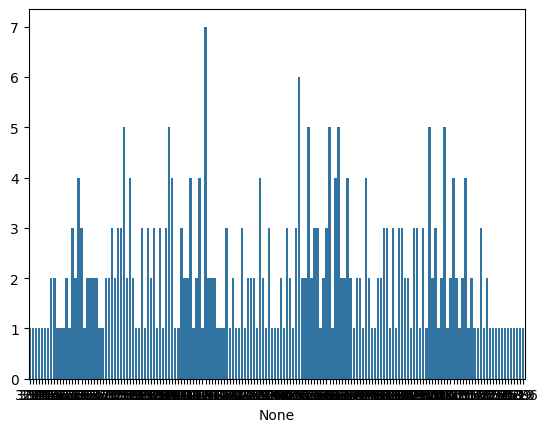

In [ ]:
counts = df['bill_length_mm'].value_counts()
print(len(counts[counts == 1]))

sns.barplot(x=counts.index, y=counts.values)
plt.show()

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

bill_length = df['bill_length_mm'].dropna()

kb = KBinsDiscretizer(n_bins=20, strategy = 'uniform', encode = 'ordinal')
kb.fit(bill_length.values.reshape(-1, 1))
bill_length_bin = kb.transform(bill_length.values.reshape(-1, 1))

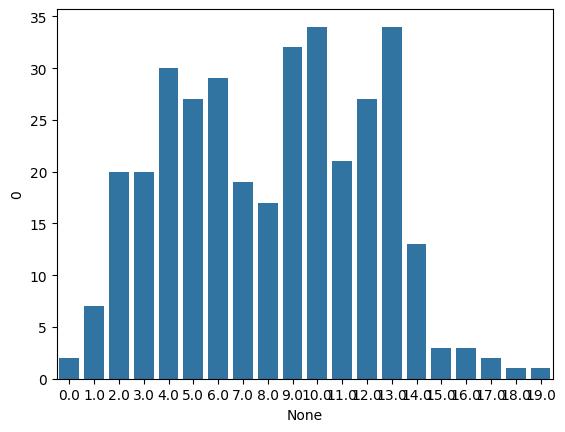

In [ ]:
bill_length_bin = pd.DataFrame(bill_length_bin)
counts = bill_length_bin[0].value_counts()
sns.barplot(x=counts.index, y=counts)

plt.show()

# Exercício 4:Discretização com Bins Variáveis no Dataset Palmer Penguins

Aplique a técnica de quantização com bins variáveis em uma variável contínua do dataset Palmer Penguins. Compare os resultados com a discretização feita no exercício anterior.

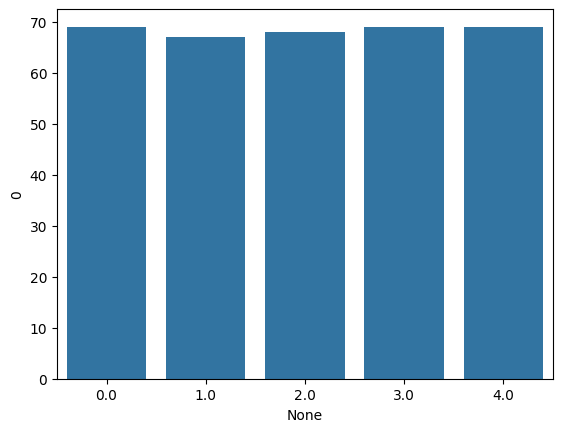

In [ ]:
bill_length = df['bill_length_mm'].dropna()
bill_length = bill_length.values.reshape(-1, 1)

kb = KBinsDiscretizer(strategy = 'quantile', encode = 'ordinal')
kb.fit(bill_length)
bill_length_bin_var = kb.transform(bill_length)

df2 = pd.DataFrame(bill_length_bin_var)
counts = df2[0].value_counts()
sns.barplot(x=counts.index, y=counts)

plt.show()

# Exercício 5: Uso de FunctionTransformer no Dataset Palmer Penguins

Aplique a FunctionTransformer do Scikit-Learn em uma variável do dataset Palmer Penguins. Descreva o processo e explique como essa transformação pode ser benéfica.

In [ ]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import make_column_transformer

def string_to_char(df):
  return df.apply(lambda x: x.str.slice(0,1))

genchar = FunctionTransformer(string_to_char)
transform = make_column_transformer((genchar, ["sex"]))
df['sex'] = transform.fit_transform(df)

df[:5]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,m,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,f,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,f,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,f,2007


# Exercício 6: Aplicação de PowerTransformer no Dataset Palmer Penguins

Utilize a PowerTransformer do Scikit-Learn para transformar uma variável do dataset Palmer Penguins. Discuta os benefícios dessa transformação.

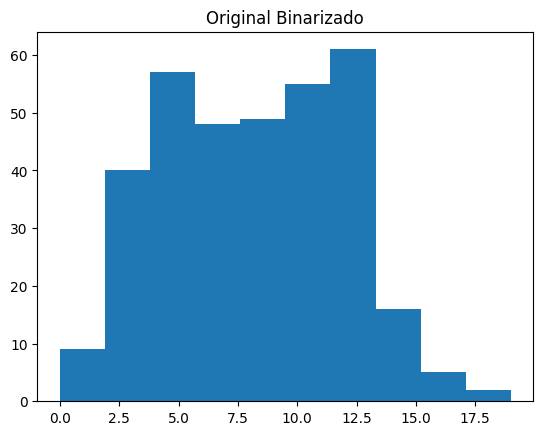

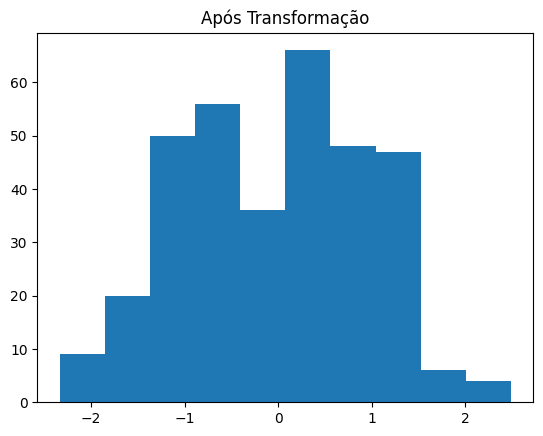

In [ ]:
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer(method='yeo-johnson')
fit = scaler.fit(bill_length_bin)
bill_length_bin_transformed = scaler.transform(bill_length_bin)

bill_length_bin_transformed = pd.DataFrame(bill_length_bin_transformed)

plt.hist(bill_length_bin)
plt.title("Original Binarizado")
plt.show()

plt.hist(bill_length_bin_transformed)
plt.title("Após Transformação")
plt.show()

# Exercício 7:Normalização Min-Max no Dataset Palmer Penguins

Aplique a normalização Min-Max do Scikit-Learn em uma ou mais variáveis do dataset Palmer Penguins. Explique como essa normalização impacta o modelo de Machine Learning.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

bill_length_mm_scaled = bill_length

scaler = MinMaxScaler()
scaler.fit(bill_length)
bill_length_mm_scaled = scaler.transform(bill_length_mm_scaled)

print(f'Min Original: {bill_length.min()}')
print(f'Min Escalado: {bill_length_mm_scaled.min()}')
print(f'Max Original: {bill_length.max()}')
print(f'Max Escalado: {bill_length_mm_scaled.max()}')

Min Original: 32.1
Min Escalado: 0.0
Max Original: 59.6
Max Escalado: 0.9999999999999998


# Exercício 8:Normalização com Standard Scaler no Dataset Palmer Penguins
Utilize o StandardScaler do Scikit-Learn para normalizar variáveis do dataset Palmer Penguins. Discuta a diferença entre esta técnica e a normalização Min-Max.

In [ ]:
from sklearn.preprocessing import StandardScaler

bill_length_std_scaled = bill_length

scaler = StandardScaler()
scaler.fit(bill_length_std_scaled)
bill_length_scaled = scaler.transform(bill_length_std_scaled)

print(f'Mean Original: {bill_length.mean()}')
print(f'Mean Escalado: {bill_length_scaled.mean()}')
print(f'Standard Deviation Original: {bill_length.std()}')
print(f'Standard Deviation Escalado: {bill_length_scaled.std()}')

Mean Original: 43.9219298245614
Mean Escalado: 1.66208827078386e-16
Standard Deviation Original: 5.4515960231618195
Standard Deviation Escalado: 1.0


# Exercício 9: Regularização Norma-L2 no Dataset Palmer Penguins
Implemente um modelo de regressão linear com regularização norma-L2 utilizando o dataset Palmer Penguins.

In [ ]:
from sklearn.preprocessing import Normalizer
from sklearn.compose   import  ColumnTransformer
from sklearn.datasets   import fetch_openml
from sklearn.pipeline   import Pipeline
from sklearn.impute   import SimpleImputer
from sklearn.preprocessing   import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [ ]:
df.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,m,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,f,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,f,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,f,2007


In [ ]:
#Separar as variáveis independentes da variável target, e em seguida separar o conjunto de treino e teste.

x = df[['bill_length_mm',	'bill_depth_mm',	'flipper_length_mm',	'body_mass_g','island','sex']] #Variáveis independentes
y = df[['species']] #Variável Target

#70% para treino, 30% para teste
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=2)

In [ ]:
#Separar as features numéricas das categóricas

x_train_num = x_train.iloc[:,:4]
x_train_cat = x_train.iloc[:,4:6]

In [ ]:
#Definir as transformações a serem aplicadas para tratamento de valores nulos e para codificar as features categóricas

num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='mean'))
])

cat_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
preproc_pipeline_x = ColumnTransformer([
    ("num", num_pipeline, x_train_num.columns),
    ("cat", cat_pipeline, x_train_cat.columns)
], remainder = 'passthrough')

In [ ]:
#Dar o fit usando o conjunto de treino e o transform no treino e teste.

x_train_transf = preproc_pipeline_x.fit_transform(x_train)
x_test_transf = preproc_pipeline_x.transform(x_test)

In [ ]:
#Executar o modelo de Regressão
log_reg = LogisticRegression(max_iter=1000, penalty='l2')
log_reg.fit(x_train_transf,y_train.values.ravel())

y_pred = log_reg.predict(x_test_transf)

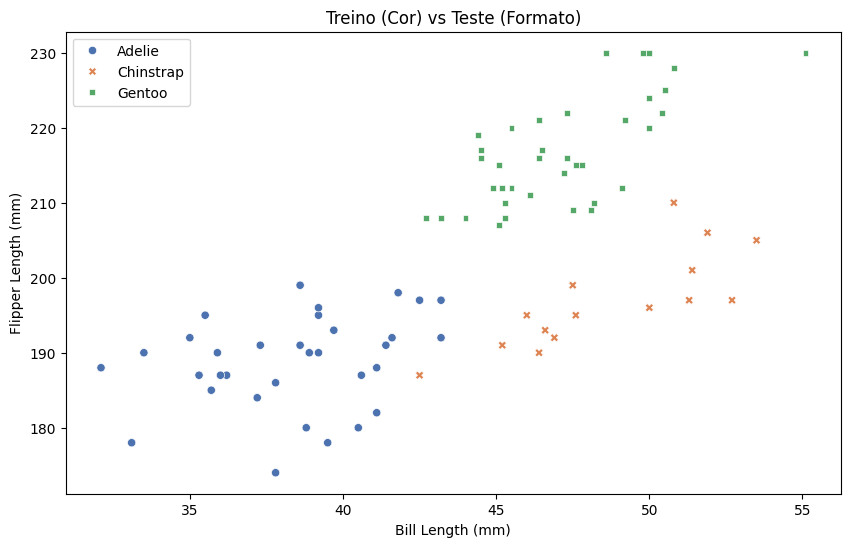

In [ ]:
#Plotar gráfico para analisar resultados

y_test_flat = y_test.values.ravel()
y_pred_flat = y_pred.ravel()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_test['bill_length_mm'], y=x_test['flipper_length_mm'], hue=y_test_flat, style=y_pred_flat, palette='deep')

plt.xlabel('Bill Length (mm)')
plt.ylabel('Flipper Length (mm)')
plt.title('Treino (Cor) vs Teste (Formato)')

plt.show()